# Limpieza III

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-outliers-o-valores-perdidos" data-toc-modified-id="Tratamiento-de-outliers-o-valores-perdidos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de <em>outliers</em> o valores perdidos</a></span><ul class="toc-item"><li><span><a href="#Eliminar-outliers" data-toc-modified-id="Eliminar-outliers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Eliminar <em>outliers</em></a></span></li><li><span><a href="#Reemplazar" data-toc-modified-id="Reemplazar-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reemplazar</a></span></li></ul></li></ul></div>

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

En este jupyter volveremos a trabajar con el mismo *dataset*, pero en este caso no trabajaremos con el orginal, si no con el que habíamos guardado en la lección anterior de Limpieza de *strings*. En concreto veremos qué son y cómo podemos gestionar los valores perdidos u *outliers*. Así que... empecemos cargándolo y explorándolo: 

In [38]:
df = pd.read_csv("datos/WDICountry_limpio.csv")

df.head(2)

,index_,country_name,m2016,f2016,short_name,2-alpha_code,currency_unit,special_notes,region,income_group,wb-2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,mean_age,total2016
0,0,Aruba,NaN,1.800,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,37,622308
1,2,Afghanistan,53.2,4.635,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,80,3607857


In [39]:
df.shape

(198, 32)

## Tratamiento de *outliers* o valores perdidos

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que no es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

- el peso máximo es de 92.31

- el peso mínimo es de 60.86

- la media del peso de la clase sería 77.085

- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 

Imaginemos ahora que el peso de las alumnas son: 

```python
pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```
En este caso: 

- el peso máximo es de 117.3

- el peso mínimo es de 60.86

- la media del peso de la clase sería 80.805

- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor peso ha hecho que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.  


Es en este caso, cuando el tratamiento de los *outliers* debe ser solucionado. Esto lo podemos hacer de distintas formas: 

- Eliminación de esos registros.

- Mantenerlos (si el problema a resolver tiene que ver con outliers). 

Pero antes de ponernos a quitar datos o reemplazarlos tenemos que identificar cuáles son los *outliers* en nuestros datos. 

- Lo podemos hacer visualmente usando un `boxplot`. 

- Identificarlos usando el rango intercuartílico. 


In [40]:
# seleccionamos solo aquellas variables numéricas ya que los outliers solo los tendremos en variable numéricas

df_numericas = df.select_dtypes(include=np.number)

In [41]:
df_numericas.head(2)

,index_,m2016,f2016,national_accounts_reference_year,latest_industrial_data,latest_trade_data,mean_age,total2016
0,0,NaN,1.800,NaN,NaN,2018.0,37,622308
1,2,53.2,4.635,NaN,NaN,2018.0,80,3607857


Como vimos en lecciones anteriores, la mejor gráfica para ver los *outliers* es un `boxplot`. Para no tener que repetir la misma línea de código una y otra vez lo que haremos será un *for loop* que recorra todas las columnas y nos haga el boxplot.

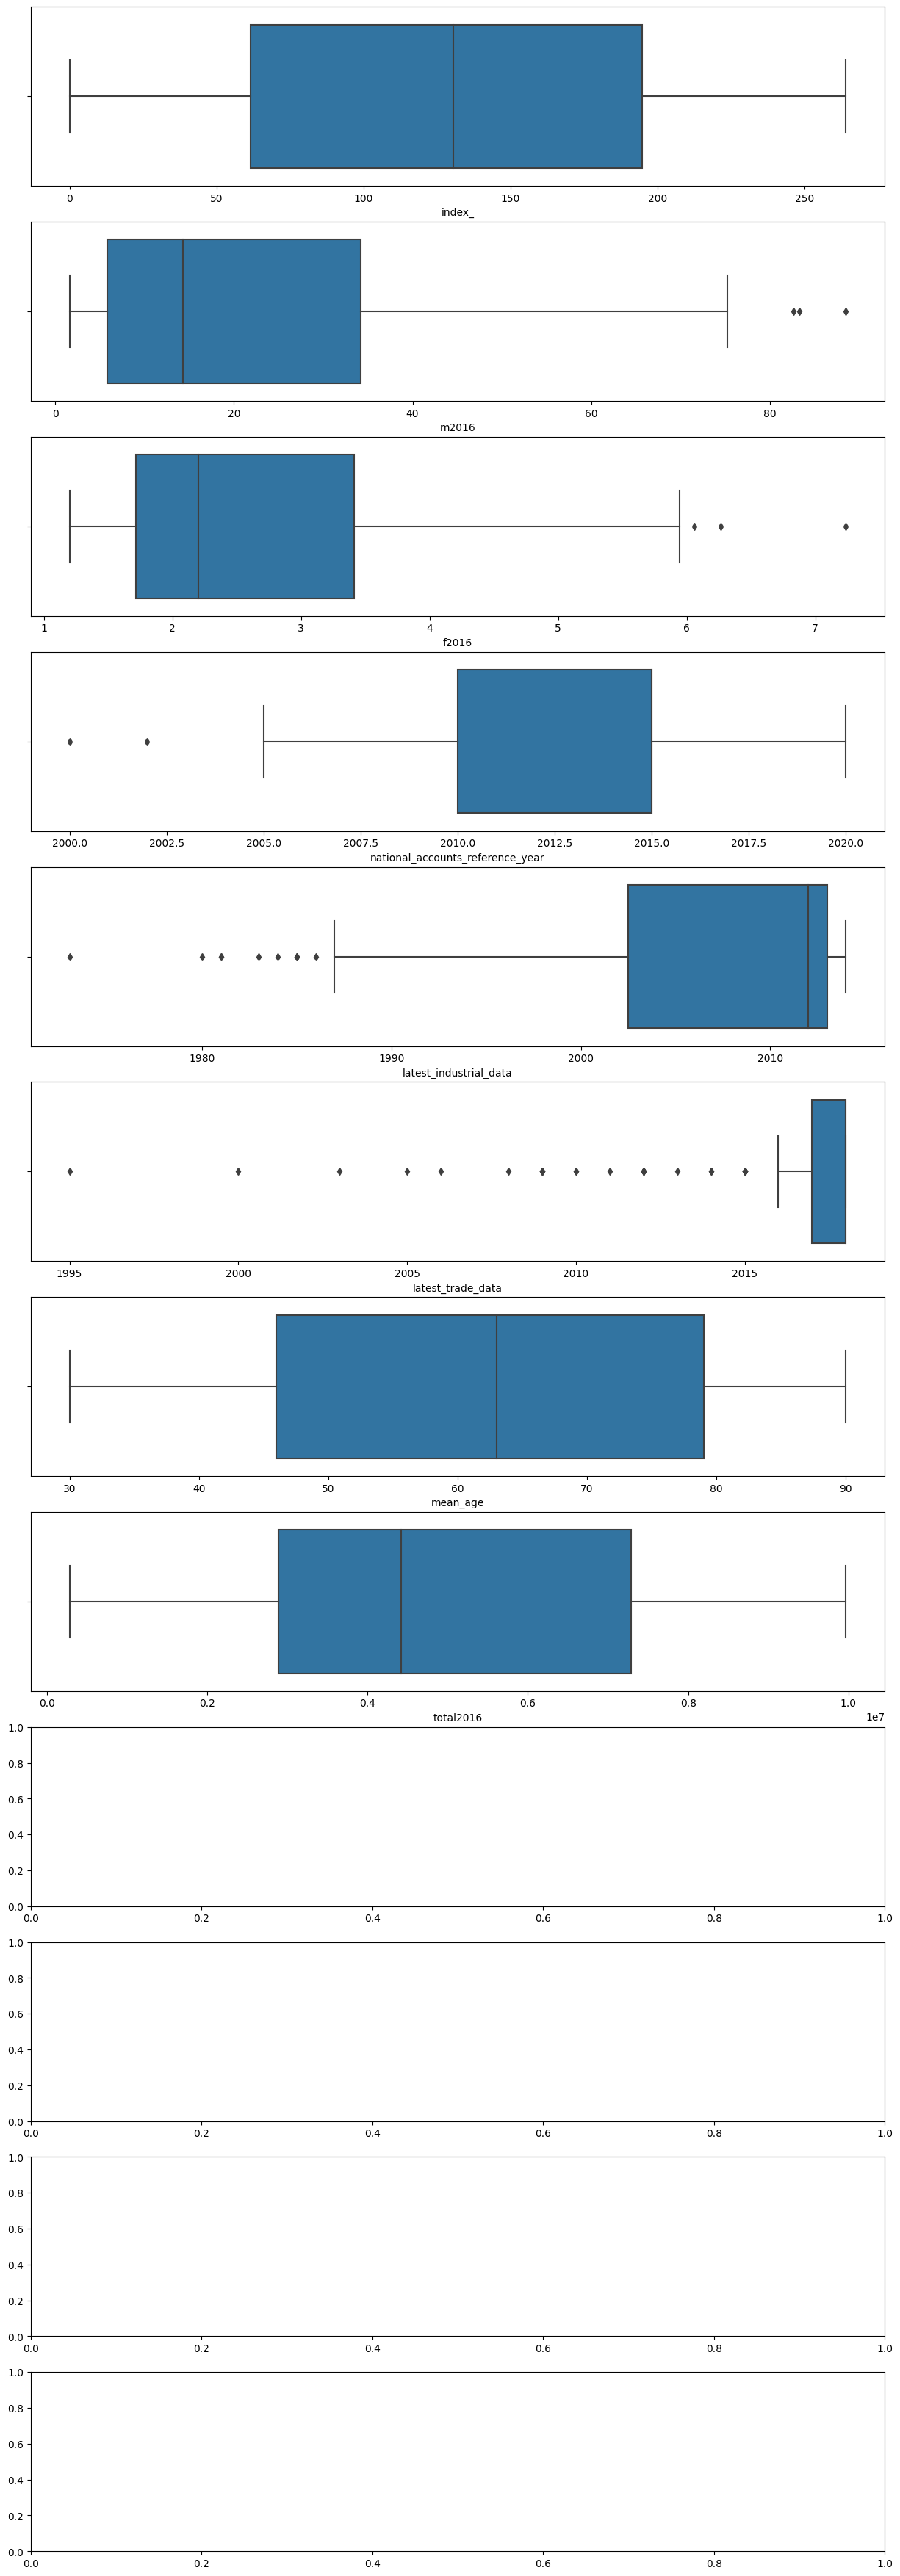

In [42]:
# tenemos 12 columnas, por lo que creamos 12 subplots
fig, ax = plt.subplots(12, 1, figsize=(15,45))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

Genial! Hemos podido identificar visualmente los *outliers* en nuestras variables numéricas. ¿Pero cómo los identificamos en nuestro *DataFrame*?

Para eso calcularemos  el rango intercuartilico (IQR), lo que haremos será: 

- Calcular el primer cuartil (Q1, 25%): es aquel en el cuál el 25% de las observaciones son menores o iguales al valor del Q1. 

- Calcular el tercer cuartil (Q3, 75%): es aquel en el cuál el 75% de las observaciones son menores o iguales al valor de Q3


- Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1

```
IQR  = Q3 - Q1
```

> Todos los valores que sean **menores que `Q1-1.5IQR`** o **mayores que `Q3+1.5IQR`** serán considerados *outliers*. 

### Empecemos con la variable `m2016`

Para calcular los cuartiles recurriremos a la librería NumPy. En esta librería podemos encontrar los métodos: 

- `np.percentile`: lo usaremos cuando **no** tengamos `nan` entre nuestros valores. 

- `np.nanpercentile`: lo usaremos cuando tengamos `nan` entre nuestros valores. 

En ambos casos tendremos que pasarle: 

- la columna sobre la que queramos calcular los cuartiles y

- el cuartil que queremos calcular. 


In [43]:
# cálculo del Q1
Q1 = np.nanpercentile(df['m2016'], 25)
Q1

5.825

In [44]:
# cálculo del Q3
Q3 = np.nanpercentile(df['m2016'], 75)
Q3

34.225

In [45]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

28.400000000000002

In [46]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

42.6

Ahora es el momento de filtrar nuestros datos filtrar/eliminar aquellos datos que sean *outliers*. Recordamos que dijimos que 

> Todos los valores que sean **menores que `Q1 - 1.5IQR`** o **mayores que `Q3 + 1.5IQR`** serán considerados *outliers*. 

por lo tanto basaremos el filtro de nuestro *DataFrame* sobre estas condiciones. Si volvemos sobre la gráfica vimos que teníamos tres *outliers*, los mismos que nos salen en el *DataFrame* `outliers_data`.

In [47]:
outliers_data = df[(df["m2016"] < Q1 - outlier_step) | (df["m2016"] > Q3 + outlier_step)]

In [48]:
outliers_data.head()

,index_,country_name,m2016,f2016,short_name,2-alpha_code,currency_unit,special_notes,region,income_group,wb-2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,mean_age,total2016
29,34,Central African Republic,88.5,4.869,Central African Republic,CF,Central African CFA franc,NaN,Sub-Saharan Africa,Low income,CF,2005,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,BPM5 (Converted into BPM6 by IMF),Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2003,"Multiple Indicator Cluster Survey, 2018/19","Priority survey (PS), 2008",NaN,NaN,1993.0,2017.0,71,3396011
158,209,Sierra Leone,83.3,4.457,Sierra Leone,SL,Sierra Leonean leone,NaN,Sub-Saharan Africa,Low income,SL,2006,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,BPM5 (Converted into BPM6 by IMF),Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2020,"Demographic and Health Survey, 2019","Integrated household survey (IHS), 2011",NaN,NaN,1993.0,2017.0,90,9172983
161,212,Somalia,82.6,6.267,Somalia,SO,Somali shilling,NaN,Sub-Saharan Africa,Low income,SO,2013,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1977–90,BPM5 (Converted into BPM6 by IMF),Actual,NaN,NaN,NaN,1987. Enumeration of settled population was in...,"Multiple Indicator Cluster Survey, 2006",NaN,NaN,NaN,1986.0,NaN,32,3671221


Perfecto, ya hemos sacado las filas que corresponden a *outliers* para nuestra columna de interés. Lo que vamos a hacer ahora es extraer los índices de las filas ya que estos son los "DNI" de nuestras filas. De esta forma luego podremos trabajar sobre estas filas.

In [49]:
# sacamos los índices de los outliers 
x = list(outliers_data.index)
x 

[29, 158, 161]

Pero esto es un poco rollo si tuvieramos que ejecutar todas estas líneas para cada columna numérica, por lo que vamos a crearnos una función: 

In [50]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [51]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['index_',
 'm2016',
 'f2016',
 'national_accounts_reference_year',
 'latest_industrial_data',
 'latest_trade_data',
 'mean_age',
 'total2016']

In [52]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)

In [53]:
# vemos que es lo que nos ha devuelto la función
print(ind)

{'m2016': [29, 158, 161], 'f2016': [116, 129, 161], 'national_accounts_reference_year': [174, 175], 'latest_industrial_data': [5, 15, 16, 48, 99, 103, 122, 131, 161, 178], 'latest_trade_data': [17, 27, 37, 40, 41, 45, 46, 51, 58, 59, 64, 65, 68, 82, 99, 128, 143, 149, 170, 171, 172, 176, 178, 179, 182, 192]}


Nos devuelve un diccionario, donde las *keys* son los nombres de las columnas que tienen *outliers* y los values son unas listas con los índices de las filas que tienen *outliers*.

Ahora ya podremos hacer el tratamiento correcto de los *outliers*, como comentabamos un poco más arriba: 

- eliminarlos,
- reemplazarlos, o
- mantenerlos. 

### Eliminar *outliers* 

Para eliminar las filas con *outliers* solo vamos a necesitar los índices. Por lo que necesitamos acceder a los valores de nuestro diccionario, para luego usarlos. 

In [54]:
# sacamos los valores de nuestro diccionario. 

valores = ind.values()

In [55]:
# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.

print(valores)

dict_values([[29, 158, 161], [116, 129, 161], [174, 175], [5, 15, 16, 48, 99, 103, 122, 131, 161, 178], [17, 27, 37, 40, 41, 45, 46, 51, 58, 59, 64, 65, 68, 82, 99, 128, 143, 149, 170, 171, 172, 176, 178, 179, 182, 192]])


In [56]:
# hacemos una set comprehension para aplanar nuestra lista de listas y dejar un set. Puede ser que nos encontremos con índices que están repetidos, ya que puede ser que una fila tenga valores que sean outliers para dos columnas. 
# si recordamos de las primeras clases, en Python tenemos los sets que no permitían tener valores duplicados.

valores = {indice for sublista in valores for indice in sublista}
print(valores)

{128, 129, 131, 5, 15, 16, 17, 143, 149, 27, 29, 158, 161, 37, 40, 41, 170, 171, 172, 45, 174, 175, 48, 46, 178, 51, 176, 179, 182, 58, 59, 64, 65, 192, 68, 82, 99, 103, 116, 122}


In [57]:
# nos hacemos una copia del dataframe original

df_sin_outliers2 = df.copy()

In [58]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers

final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)])

Por último chequeamos las filas del *DataFrame* nuevo y comprobamos si se han borrado los registros que queríamos. 

In [63]:
df.shape

(198, 32)

In [64]:
final.shape

(158, 32)

Vemos que se nos han eliminado filas, las correspondientes a los índices donde habíamos identificado los nulos. 

### Reemplazar

También podemos reemplazar los valores de los *outliers* por la media o la mediana. Recordamos que la función para detectar los *outliers* nos devolvía un diccionario, donde las *keys* eran el nombre de las columnas y los *values* la lista de los índices donde tenemos nulos. 

In [65]:
ind

{'m2016': [29, 158, 161],
 'f2016': [116, 129, 161],
 'national_accounts_reference_year': [174, 175],
 'latest_industrial_data': [5, 15, 16, 48, 99, 103, 122, 131, 161, 178],
 'latest_trade_data': [17,
  27,
  37,
  40,
  41,
  45,
  46,
  51,
  58,
  59,
  64,
  65,
  68,
  82,
  99,
  128,
  143,
  149,
  170,
  171,
  172,
  176,
  178,
  179,
  182,
  192]}

In [62]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [66]:
df.head()

,index_,country_name,m2016,f2016,short_name,2-alpha_code,currency_unit,special_notes,region,income_group,wb-2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,mean_age,total2016
0,0,Aruba,NaN,1.800,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,37,622308
1,2,Afghanistan,53.2,4.635,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,80,3607857
2,4,Angola,54.6,5.694,Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,BPM6,Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,72,5446262
3,5,Albania,12.0,1.713,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,2010.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2020 (expected),"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,38,3185249
4,6,Andorra,2.4,NaN,Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,2010,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,BPM6,NaN,General trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2018.0,76,9117514


## Ejercicios 

- 1️⃣ Detecta los outliers de nuestro *dataset* y elimínalos. Tenemos la formulita en los apuntes, pero lo ideal es que intentemos hacerlo nosotras! 

    No te olvides de visualizarlos! 

- 2️⃣ Reemplaza los outliers por la métrica que consideréis mas correcta.
